<div class="alert alert-block alert-success">
<h3>Limpieza / EDA</h3>
</div>

In [60]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 🔎 Exploratory Data Analysis

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder


In [62]:
raw_data_path = '../data/raw/road_traffic_accidents_dataset.csv'

In [63]:
raw_data = pd.read_csv(raw_data_path)

In [64]:
profile = ProfileReport(raw_data)

In [65]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### 🧹 Data Cleaning

**Gestioń de valores NULOS**

In [66]:
raw_data.isnull().sum().sort_values(ascending=False)

Defect_of_vehicle              4427
Service_year_of_vehicle        3928
Work_of_casuality              3198
Fitness_of_casuality           2635
Type_of_vehicle                 950
Types_of_Junction               887
Driving_experience              829
Educational_level               741
Vehicle_driver_relation         579
Owner_of_vehicle                482
Lanes_or_Medians                385
Vehicle_movement                308
Area_accident_occured           239
Road_surface_type               172
Type_of_collision               155
Road_allignment                 142
Casualty_class                    0
Pedestrian_movement               0
Cause_of_accident                 0
Casualty_severity                 0
Age_band_of_casualty              0
Sex_of_casualty                   0
Time                              0
Road_surface_conditions           0
Number_of_casualties              0
Number_of_vehicles_involved       0
Weather_conditions                0
Light_conditions            

Completar valores nulos con el valor más frecuente (MODA).
Todos lso valores nulos corresponden a columnas categóricas

In [67]:
temp_data = raw_data.copy()

categorical_columns = temp_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    mode_value = temp_data[col].mode()[0]
    
    temp_data[col] = temp_data[col].fillna(mode_value)


In [68]:
temp_data.isnull().sum().sort_values(ascending=False)

Time                           0
Day_of_week                    0
Cause_of_accident              0
Pedestrian_movement            0
Fitness_of_casuality           0
Work_of_casuality              0
Casualty_severity              0
Age_band_of_casualty           0
Sex_of_casualty                0
Casualty_class                 0
Vehicle_movement               0
Number_of_casualties           0
Number_of_vehicles_involved    0
Type_of_collision              0
Weather_conditions             0
Light_conditions               0
Road_surface_conditions        0
Road_surface_type              0
Types_of_Junction              0
Road_allignment                0
Lanes_or_Medians               0
Area_accident_occured          0
Defect_of_vehicle              0
Service_year_of_vehicle        0
Owner_of_vehicle               0
Type_of_vehicle                0
Driving_experience             0
Vehicle_driver_relation        0
Educational_level              0
Sex_of_driver                  0
Age_band_o

In [69]:
temp_data.columns = temp_data.columns.str.lower()

**Conversión del formato fecha y hora, a quedarme sólo con el valor de la hora**

In [70]:
temp_data.loc[:, 'time'] = pd.to_datetime(temp_data['time'], format='%H:%M:%S').dt.hour


In [71]:
temp_data

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


**Realizar el label encoder para la columna objetivo -> accidente_severity**

In [72]:
columns_to_encode = ['accident_severity']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    label_encoder = LabelEncoder()
    temp_data.loc[:, column] = label_encoder.fit_transform(temp_data[column])


In [73]:
temp_data

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,2
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,2
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,1
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,2
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,2
12312,18,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,2
12313,13,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,1
12314,13,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,2


**Obtener dummies para el resto de columnas**

In [74]:
temp_data = pd.get_dummies(temp_data, columns=[col for col in temp_data.columns if col not in columns_to_encode], dtype=int)

In [75]:
temp_data

,accident_severity,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,...,cause_of_accident_No distancing,cause_of_accident_No priority to pedestrian,cause_of_accident_No priority to vehicle,cause_of_accident_Other,cause_of_accident_Overloading,cause_of_accident_Overspeed,cause_of_accident_Overtaking,cause_of_accident_Overturning,cause_of_accident_Turnover,cause_of_accident_Unknown
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12312,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12313,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12314,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
temp_data.columns = temp_data.columns.str.lower()

**Eliminar columnas con alto coeficiente de correlación al ser información redundante**

In [77]:
data = temp_data.copy()

correlation_matrix = data.corr().abs()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

upper_triangle = correlation_matrix.where(mask)

correlation_threshold = 0.7
columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

print(f"Columns to drop: {len(columns_to_drop)}")
for col in columns_to_drop:
    print(col)

Columns to drop: 13
sex_of_driver_male
vehicle_driver_relation_owner
owner_of_vehicle_owner
defect_of_vehicle_no defect
road_surface_conditions_wet or damp
light_conditions_daylight
weather_conditions_raining
sex_of_casualty_na
age_band_of_casualty_na
casualty_severity_3
casualty_severity_na
work_of_casuality_self-employed
pedestrian_movement_not a pedestrian


In [78]:
temp_data = temp_data.drop(columns=columns_to_drop)

**Guardar fichero con la información procesada**

In [79]:
# Construct the output file path
base_name = os.path.basename(raw_data_path)
name, ext = os.path.splitext(base_name)
output_file_name = f"{name}_proc{ext}"

# Define the processed directory path
processed_dir = '../data/processed'
os.makedirs(processed_dir, exist_ok=True)
output_path = os.path.join(processed_dir, output_file_name)

temp_data.to_csv(output_path, index=False)
print(f"\n✅ The processed DataFrame has been saved to {output_path}")


✅ The processed DataFrame has been saved to ../data/processed\road_traffic_accidents_dataset_proc.csv


In [80]:
proc_data_path = '../data/processed/road_traffic_accidents_dataset_proc.csv'

proc_data = pd.read_csv(proc_data_path)

In [81]:
proc_data

,accident_severity,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,...,cause_of_accident_no distancing,cause_of_accident_no priority to pedestrian,cause_of_accident_no priority to vehicle,cause_of_accident_other,cause_of_accident_overloading,cause_of_accident_overspeed,cause_of_accident_overtaking,cause_of_accident_overturning,cause_of_accident_turnover,cause_of_accident_unknown
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12312,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12313,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12314,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
proc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Columns: 230 entries, accident_severity to cause_of_accident_unknown
dtypes: int64(230)
memory usage: 21.6 MB


In [83]:
proc_data.describe(include='all')

,accident_severity,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,...,cause_of_accident_no distancing,cause_of_accident_no priority to pedestrian,cause_of_accident_no priority to vehicle,cause_of_accident_other,cause_of_accident_overloading,cause_of_accident_overspeed,cause_of_accident_overtaking,cause_of_accident_overturning,cause_of_accident_turnover,cause_of_accident_unknown
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,...,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.00000
mean,1.832819,0.016726,0.010880,0.006820,0.006820,0.007389,0.006171,0.017376,0.043196,0.067230,...,0.183745,0.058542,0.098003,0.037025,0.004791,0.004953,0.034914,0.012098,0.006333,0.00203
std,0.406082,0.128249,0.103743,0.082307,0.082307,0.085643,0.078315,0.130672,0.203306,0.250429,...,0.387292,0.234775,0.297330,0.188831,0.069050,0.070205,0.183569,0.109328,0.079332,0.04501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [84]:
proc_data.isnull().sum()


accident_severity                0
time_0                           0
time_1                           0
time_2                           0
time_3                           0
                                ..
cause_of_accident_overspeed      0
cause_of_accident_overtaking     0
cause_of_accident_overturning    0
cause_of_accident_turnover       0
cause_of_accident_unknown        0
Length: 230, dtype: int64

In [85]:
proc_data.duplicated().sum()


0

**Consultar la severidad de los accidentes**

In [86]:
injuries = proc_data[['accident_severity']].value_counts()

print(injuries)

accident_severity
2                    10415
1                     1743
0                      158
Name: count, dtype: int64


In [87]:
# Get the value counts of the encoded values
injuries = proc_data['accident_severity'].value_counts()

# Map the encoded values back to the original labels
injuries.index = label_encoder.inverse_transform(injuries.index)

# Print the result with original labels
print(injuries)

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


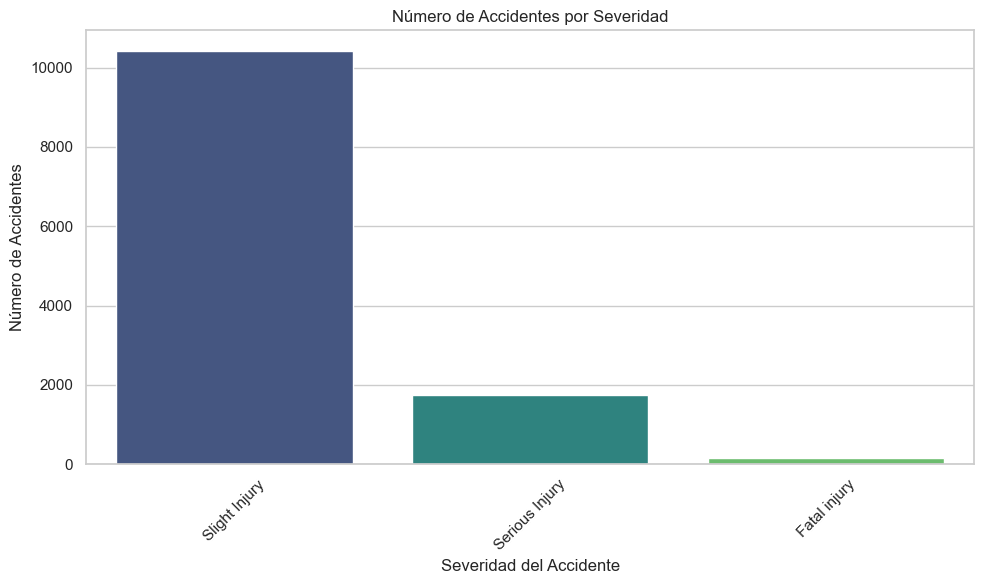

In [88]:
injuries_df = injuries.reset_index(name='count')
injuries_df.columns = ['accident_severity', 'count']

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='accident_severity', y='count', data=injuries_df, palette="viridis", hue='accident_severity')

plt.title('Número de Accidentes por Severidad')
plt.xlabel('Severidad del Accidente')
plt.ylabel('Número de Accidentes')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()